動作の骨格座標プロット作成と分類モデル

参考：

https://datawokagaku.com/logstic_reg_python/

https://datawokagaku.com/confusion_matrix/



In [1]:
# -*- coding: utf-8 -*-

import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#CSVファイル読み込み。
df = pd.read_csv('C:/miyoshilab/arm/movie/2023-01-11/rsEx1_gento1/rsEx1_gento1.csv', sep=",")

# human カラムを落とす
df.drop('human', axis=1, inplace=True)
display(df.head(5))

# カットしている時間のみのリスト
cutOnly = df.copy()
cutOnly = cutOnly.iloc[range(100, 415), :]
display(cutOnly.head(5))

print(df['pos_04x'].size)

,Unnamed: 0,flame,pos_00x,pos_00y,pos_01x,pos_01y,pos_02x,pos_02y,pos_03x,pos_03y,...,pos_11x,pos_11y,pos_14x,pos_14y,pos_15x,pos_15y,pos_16x,pos_16y,pos_17x,pos_17y
0,0,0,302,104,308,168,254,170,234,254,...,340,326,292,96,314,96,278,108,330,106
1,0,1,302,104,308,168,252,170,234,254,...,340,324,292,96,314,96,278,108,330,106
2,0,2,302,104,308,170,252,170,234,254,...,340,326,292,96,314,96,278,108,330,106
3,0,3,302,106,308,168,254,170,234,252,...,342,324,292,98,314,98,278,108,330,106
4,0,4,304,106,308,168,254,170,234,252,...,342,326,292,98,314,98,280,106,332,106


,Unnamed: 0,flame,pos_00x,pos_00y,pos_01x,pos_01y,pos_02x,pos_02y,pos_03x,pos_03y,...,pos_11x,pos_11y,pos_14x,pos_14y,pos_15x,pos_15y,pos_16x,pos_16y,pos_17x,pos_17y
100,0,100,284,226,300,200,244,198,242,276,...,348,374,276,214,296,214,260,198,316,196
101,0,101,284,226,298,200,244,200,244,280,...,348,376,276,214,296,214,260,198,316,196
102,0,102,286,226,300,202,246,202,244,280,...,348,378,276,214,296,214,260,198,316,196
103,0,103,286,226,300,200,244,200,244,278,...,348,376,276,216,298,214,260,196,318,196
104,0,104,286,226,300,200,244,198,242,274,...,348,374,276,214,298,214,260,194,318,194


520


時間軸での右手首と左手首の座標をプロットして比較

ax.lines before plot:
 <Axes.ArtistList of 0 lines>
ax.lines after 1st plot:
 <Axes.ArtistList of 1 lines>
ax.lines after 2nd plot:
 <Axes.ArtistList of 2 lines>
line1: Line2D(left hand x)
line2: Line2D(right hand x)
ax.lines before plot:
 <Axes.ArtistList of 0 lines>
ax.lines after 1st plot:
 <Axes.ArtistList of 1 lines>
ax.lines after 2nd plot:
 <Axes.ArtistList of 2 lines>
line1: Line2D(left hand y)
line2: Line2D(right hand y)


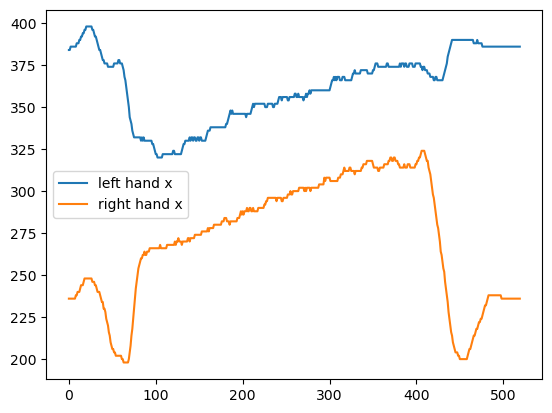

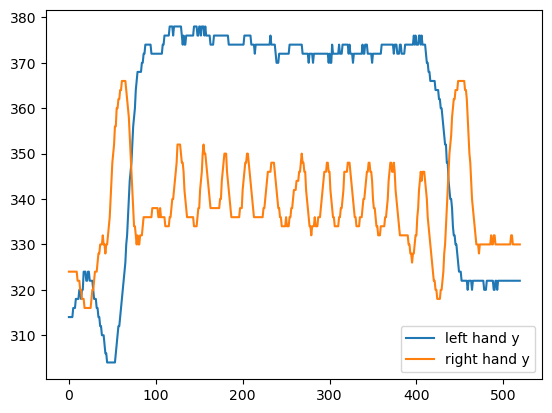

In [2]:
'''
00: 頭, 01: 胸, 02: 右肩, 03: 右肘, 04: 右手首,  05: 左肩, 06: 左肘, 07: 左手首, 
08: 右尻, 11: 左尻, 14: 右目, 15: 左目, 16: 右耳, 17: 左耳 
'''

fig = plt.figure() # Figureを作成
ax = fig.add_subplot(1,1,1) # Axesを作成
print('ax.lines before plot:\n', ax.lines) # Axes.linesは空リスト
line1, = ax.plot(df['flame'], df['pos_07x'], label='left hand x') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 1st plot:\n', ax.lines)
line2, = ax.plot(df['flame'], df['pos_04x'], label='right hand x') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 2nd plot:\n', ax.lines)
ax.legend()
print('line1:', line1)
print('line2:', line2)

# y point of left and right hands
fig_y = plt.figure() # Figureを作成
ax_y = fig_y.add_subplot(1,1,1) # Axesを作成
print('ax.lines before plot:\n', ax_y.lines) # Axes.linesは空リスト
line1_y, = ax_y.plot(df['flame'], df['pos_07y'], label='left hand y') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 1st plot:\n', ax_y.lines)
line2_y, = ax_y.plot(df['flame'], df['pos_04y'], label='right hand y') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 2nd plot:\n', ax_y.lines)
ax_y.legend()
print('line1:', line1_y)
print('line2:', line2_y)

時間を抹消して比較

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


axHandsX.lines before plot:
 <Axes.ArtistList of 0 lines>
axHandsX.lines after 1st plot:
 <Axes.ArtistList of 1 lines>
lineHandsX: Line2D(_child0)
axHandsY.lines before plot:
 <Axes.ArtistList of 0 lines>
axHandsY.lines after 1st plot:
 <Axes.ArtistList of 1 lines>
lineHandsY: Line2D(_child0)


Text(0, 0.5, 'Y Coorditation of Left Hand')

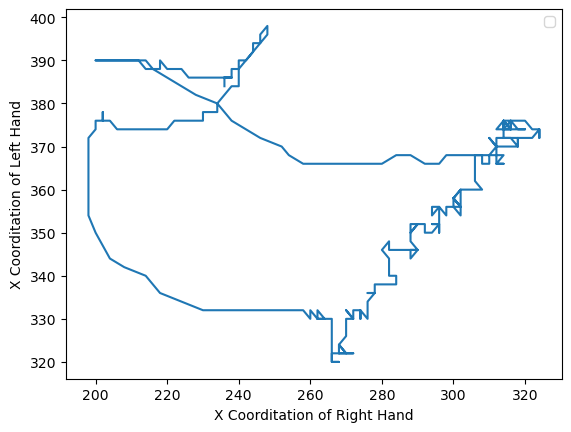

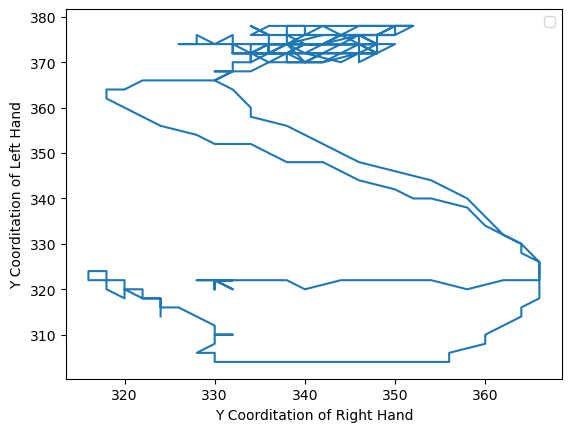

In [3]:

'''
00: 頭, 01: 胸, 02: 右肩, 03: 右肘, 04: 右手首,  05: 左肩, 06: 左肘, 07: 左手首, 
08: 右尻, 11: 左尻, 14: 右目, 15: 左目, 16: 右耳, 17: 左耳 
'''

# X軸同士の比較
figHandsX = plt.figure() # Figureを作成
axHandsX = figHandsX.add_subplot(1,1,1) # Axesを作成
print('axHandsX.lines before plot:\n', axHandsX.lines) # Axes.linesは空リスト
# 横軸に右手，縦軸に左手をプロット
lineHandsX, = axHandsX.plot(df['pos_04x'], df['pos_07x'])
print('axHandsX.lines after 1st plot:\n', axHandsX.lines)# Axes.linesにLine2Dを追加+その他の設定
axHandsX.legend()
print('lineHandsX:', lineHandsX) # Axes.linesにLine2Dを追加+その他の設定
axHandsX.set_xlabel('X Coorditation of Right Hand')
axHandsX.set_ylabel('X Coorditation of Left Hand')

# Y軸同士の比較
figHandsY = plt.figure() # Figureを作成
axHandsY = figHandsY.add_subplot(1,1,1) # Axesを作成
print('axHandsY.lines before plot:\n', axHandsY.lines) # Axes.linesは空リスト
# 横軸に右手，縦軸に左手をプロット
lineHandsY, = axHandsY.plot(df['pos_04y'], df['pos_07y']) # Axes.linesにLine2Dを追加+その他の設定
print('axHandsY.lines after 1st plot:\n', axHandsY.lines)# Axes.linesにLine2Dを追加+その他の設定
axHandsY.legend()
print('lineHandsY:', lineHandsY) # Axes.linesにLine2Dを追加+その他の設定
axHandsY.set_xlabel('Y Coorditation of Right Hand')
axHandsY.set_ylabel('Y Coorditation of Left Hand')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


axHandsX.lines before plot:
 <Axes.ArtistList of 0 lines>
axHandsX.lines after 1st plot:
 <Axes.ArtistList of 1 lines>
lineHandsX: Line2D(_child0)
axHandsY.lines before plot:
 <Axes.ArtistList of 0 lines>
axHandsY.lines after 1st plot:
 <Axes.ArtistList of 1 lines>
lineHandsY: Line2D(_child0)


Text(0, 0.5, 'Y Coorditation of Left Hand')

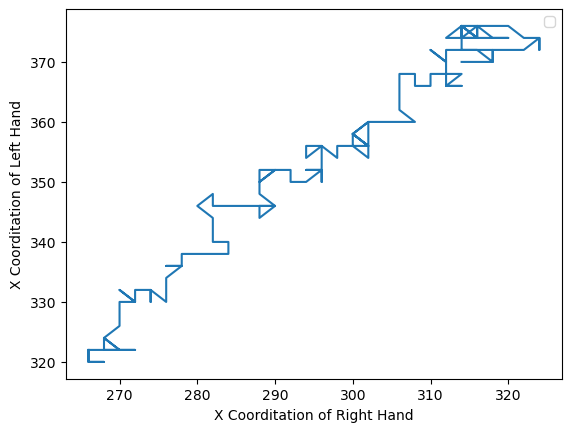

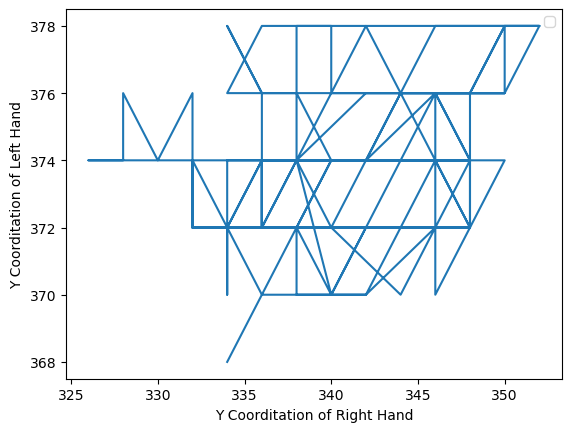

In [4]:
# カット動作をしている時間だけ（flame: 100-415）の相関の作成

'''
00: 頭, 01: 胸, 02: 右肩, 03: 右肘, 04: 右手首,  05: 左肩, 06: 左肘, 07: 左手首, 
08: 右尻, 11: 左尻, 14: 右目, 15: 左目, 16: 右耳, 17: 左耳 
'''

# X軸同士の比較
figHandsX = plt.figure() # Figureを作成
axHandsX = figHandsX.add_subplot(1,1,1) # Axesを作成
print('axHandsX.lines before plot:\n', axHandsX.lines) # Axes.linesは空リスト
# 横軸に右手，縦軸に左手をプロット
lineHandsX, = axHandsX.plot(cutOnly['pos_04x'], cutOnly['pos_07x'])
print('axHandsX.lines after 1st plot:\n', axHandsX.lines)# Axes.linesにLine2Dを追加+その他の設定
axHandsX.legend()
print('lineHandsX:', lineHandsX) # Axes.linesにLine2Dを追加+その他の設定
axHandsX.set_xlabel('X Coorditation of Right Hand')
axHandsX.set_ylabel('X Coorditation of Left Hand')

# Y軸同士の比較
figHandsY = plt.figure() # Figureを作成
axHandsY = figHandsY.add_subplot(1,1,1) # Axesを作成
print('axHandsY.lines before plot:\n', axHandsY.lines) # Axes.linesは空リスト
# 横軸に右手，縦軸に左手をプロット
lineHandsY, = axHandsY.plot(cutOnly['pos_04y'], cutOnly['pos_07y']) # Axes.linesにLine2Dを追加+その他の設定
print('axHandsY.lines after 1st plot:\n', axHandsY.lines)# Axes.linesにLine2Dを追加+その他の設定
axHandsY.legend()
print('lineHandsY:', lineHandsY) # Axes.linesにLine2Dを追加+その他の設定
axHandsY.set_xlabel('Y Coorditation of Right Hand')
axHandsY.set_ylabel('Y Coorditation of Left Hand')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


axX.collections before plot:
 <Axes.ArtistList of 0 collections>
axX.collections after 1st plot:
 <Axes.ArtistList of 1 collections>
scatHandsX: <matplotlib.collections.PathCollection object at 0x000001F824EF4760>
axY.collections before plot:
 <Axes.ArtistList of 0 collections>
axY.collections after 1st plot:
 <Axes.ArtistList of 1 collections>
scatHandsY: <matplotlib.collections.PathCollection object at 0x000001F824F471C0>


Text(0, 0.5, 'Y Coorditation of Left Hand')

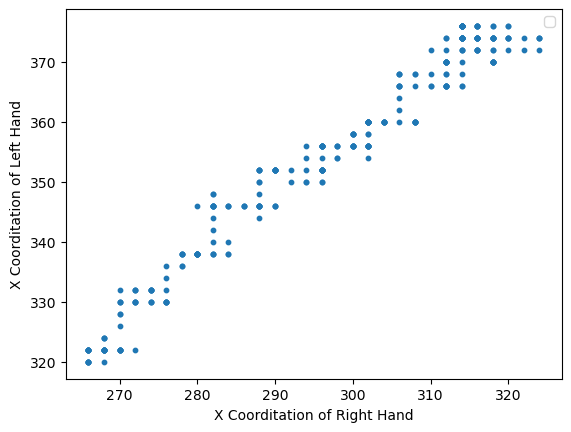

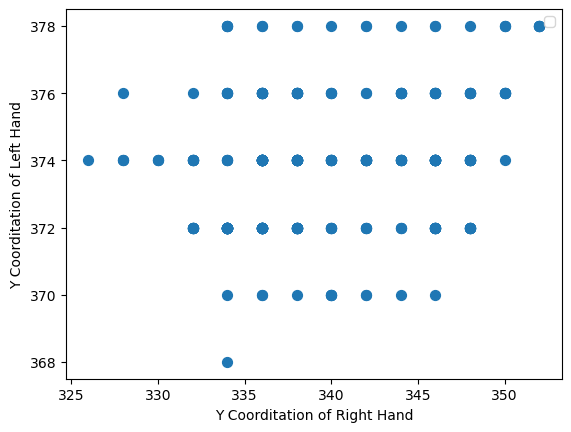

In [5]:
# カット動作をしている時間だけ（flame: 100-415）の相関の作成

'''
00: 頭, 01: 胸, 02: 右肩, 03: 右肘, 04: 右手首,  05: 左肩, 06: 左肘, 07: 左手首, 
08: 右尻, 11: 左尻, 14: 右目, 15: 左目, 16: 右耳, 17: 左耳 
'''

# X軸同士の比較
figX = plt.figure() # Figureを作成
axX = figX.add_subplot(1,1,1) # Axesを作成
print('axX.collections before plot:\n', axX.collections) # Axes.linesは空リスト
# 横軸に右手，縦軸に左手をプロット
scatHandsX = axX.scatter(cutOnly['pos_04x'], cutOnly['pos_07x'], s=10)
print('axX.collections after 1st plot:\n', axX.collections)# Axes.linesにLine2Dを追加+その他の設定
axX.legend()
print('scatHandsX:', scatHandsX) # Axes.linesにLine2Dを追加+その他の設定
axX.set_xlabel('X Coorditation of Right Hand')
axX.set_ylabel('X Coorditation of Left Hand')

# Y軸同士の比較
figY = plt.figure() # Figureを作成
axY = figY.add_subplot(1,1,1) # Axesを作成
print('axY.collections before plot:\n', axY.collections) # Axes.linesは空リスト
# 横軸に右手，縦軸に左手をプロット
scatHandsY = axY.scatter(cutOnly['pos_04y'], cutOnly['pos_07y'], s=50) # Axes.linesにLine2Dを追加+その他の設定
print('axY.collections after 1st plot:\n', axY.collections)# Axes.linesにLine2Dを追加+その他の設定
axY.legend()
print('scatHandsY:', scatHandsY) # Axes.linesにLine2Dを追加+その他の設定
axY.set_xlabel('Y Coorditation of Right Hand')
axY.set_ylabel('Y Coorditation of Left Hand')

In [6]:
dfCut = cutOnly.drop(columns = cutOnly.columns[0:9], axis=1)
dfCut_corr = dfCut.corr()
print(dfCut_corr)
print(type(dfCut_corr))

          pos_03y   pos_04x   pos_04y   pos_05x   pos_05y   pos_06x   pos_06y  \
pos_03y  1.000000 -0.323107  0.858688 -0.441381 -0.496903 -0.427865  0.334399   
pos_04x -0.323107  1.000000 -0.075147  0.985277  0.495309  0.984494 -0.385697   
pos_04y  0.858688 -0.075147  1.000000 -0.216065 -0.363567 -0.197580  0.352828   
pos_05x -0.441381  0.985277 -0.216065  1.000000  0.550929  0.995163 -0.408149   
pos_05y -0.496903  0.495309 -0.363567  0.550929  1.000000  0.537350 -0.126238   
pos_06x -0.427865  0.984494 -0.197580  0.995163  0.537350  1.000000 -0.413164   
pos_06y  0.334399 -0.385697  0.352828 -0.408149 -0.126238 -0.413164  1.000000   
pos_07x -0.437550  0.981669 -0.196439  0.991871  0.546005  0.994406 -0.392714   
pos_07y  0.342634 -0.576757  0.260493 -0.612582 -0.064365 -0.612011  0.460703   
pos_08x -0.334029  0.949362 -0.104323  0.951067  0.437747  0.952683 -0.279267   
pos_08y  0.337781 -0.860674  0.145774 -0.853367 -0.352444 -0.849521  0.415238   
pos_11x -0.261437  0.954801 

# 速度項の解析

## 関数の定義

In [7]:
# 中心差分
def diff_x(x, n, flame):
    return (x[n+1] - x[n-1]) / (2.0 * flame)

# 前方差分
def forward_diff(x, n, flame):
    return (x[n+1] - x[n]) / flame

# 後方差分
def back_diff(x, n, flame):
    return (x[n] - x[n-1]) / flame

## 速度の導出

In [8]:
# 速度に関するdataflameを作成
df_spd = pd.DataFrame(np.arange(5 * df['flame'].size).reshape(df['flame'].size, 5), 
                      columns=['t', 'pos_04x', 'pos_07x', 'pos_04y', 'pos_07y'])

print(df_spd)

        t  pos_04x  pos_07x  pos_04y  pos_07y
0       0        1        2        3        4
1       5        6        7        8        9
2      10       11       12       13       14
3      15       16       17       18       19
4      20       21       22       23       24
..    ...      ...      ...      ...      ...
515  2575     2576     2577     2578     2579
516  2580     2581     2582     2583     2584
517  2585     2586     2587     2588     2589
518  2590     2591     2592     2593     2594
519  2595     2596     2597     2598     2599

[520 rows x 5 columns]


## 微分した値を導出

In [9]:
time = 0.0
fps = 30 # フレームレート
fps_inv = 1.0 / float(fps)
max_f = df.flame.size - 1

l_spd = [[0] * df.flame.size for i in range(4)]
l_pos = [[0] * df.flame.size for i in range(4)]

l_pos[0] = df.pos_04x
l_pos[1] = df.pos_07x
l_pos[2] = df.pos_04y
l_pos[3] = df.pos_07y

# 前方差分
for i in range(0, 4):
    l_spd[0][0] = forward_diff(l_pos[i], 0, fps_inv)
print('0行目：', [r[0] for r in l_spd])

# 後方差分
for i in range(0, 4):
    l_spd[0][max_f] = back_diff(l_pos[i], max_f, fps_inv)
print('最終行：', [r[-1] for r in l_spd])

# 中心差分
for i in range(0, 4):
    for j in range(1, max_f):
        l_spd[i][j] = diff_x(l_pos[i], j, fps_inv)
        
print(l_spd[0])

0行目： [0.0, 0, 0, 0]
最終行： [0.0, 0, 0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 30.0, 30.0, 30.0, 0.0, 30.0, 60.0, 30.0, 0.0, 30.0, 60.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -30.0, -30.0, 0.0, -30.0, -30.0, -30.0, -60.0, -30.0, 0.0, -30.0, -60.0, -60.0, -30.0, -60.0, -60.0, -30.0, -90.0, -90.0, -60.0, -90.0, -90.0, -90.0, -90.0, -60.0, -30.0, -30.0, -30.0, -30.0, -30.0, 0.0, 0.0, 0.0, 0.0, 0.0, -30.0, -30.0, -30.0, -30.0, 0.0, 0.0, 0.0, 0.0, 30.0, 90.0, 120.0, 150.0, 150.0, 150.0, 180.0, 180.0, 180.0, 150.0, 120.0, 120.0, 90.0, 60.0, 60.0, 30.0, 30.0, 30.0, 30.0, 0.0, -30.0, 30.0, 30.0, 0.0, 30.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, -30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 30.0, 30.0, 0.0, -30.0, 0.0, -30.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 30.0, 30.0, -30.0, 0.0, 30.0, 0.0, 0.0, 0.0, 30.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0

In [10]:
"""
flame = 0
for index, data in df_spd.iterrows():
    df_spd.loc[index, 't'] = flame
    flame += 1
"""
# 時刻の算出
for index, data in df_spd.iterrows():
    df_spd.loc[index, 't'] = time
    time += fps_inv
    
# 計算した値をdataframeに格納
df_spd.pos_04x = l_spd[0]
df_spd.pos_07x = l_spd[1]
df_spd.pos_04y = l_spd[2]
df_spd.pos_07y = l_spd[3]

print(df_spd)

             t  pos_04x  pos_07x  pos_04y  pos_07y
0     0.000000      0.0      0.0      0.0      0.0
1     0.033333      0.0     30.0      0.0      0.0
2     0.066667      0.0     30.0      0.0      0.0
3     0.100000      0.0      0.0      0.0      0.0
4     0.133333      0.0      0.0      0.0     30.0
..         ...      ...      ...      ...      ...
515  17.166667      0.0      0.0      0.0      0.0
516  17.200000      0.0      0.0      0.0      0.0
517  17.233333      0.0      0.0      0.0      0.0
518  17.266667      0.0      0.0      0.0      0.0
519  17.300000      0.0      0.0      0.0      0.0

[520 rows x 5 columns]


ax.lines before plot:
 <Axes.ArtistList of 0 lines>
ax.lines after 1st plot:
 <Axes.ArtistList of 1 lines>
ax.lines after 2nd plot:
 <Axes.ArtistList of 2 lines>
line1: Line2D(left hand x)
line2: Line2D(right hand x)
ax.lines before plot:
 <Axes.ArtistList of 0 lines>
ax.lines after 1st plot:
 <Axes.ArtistList of 1 lines>
ax.lines after 2nd plot:
 <Axes.ArtistList of 2 lines>
line1: Line2D(left hand y)
line2: Line2D(right hand y)


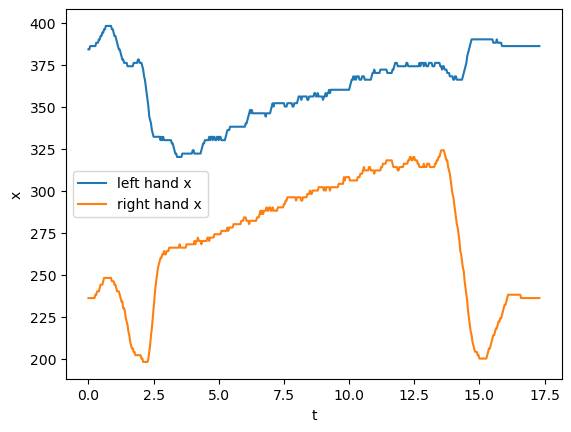

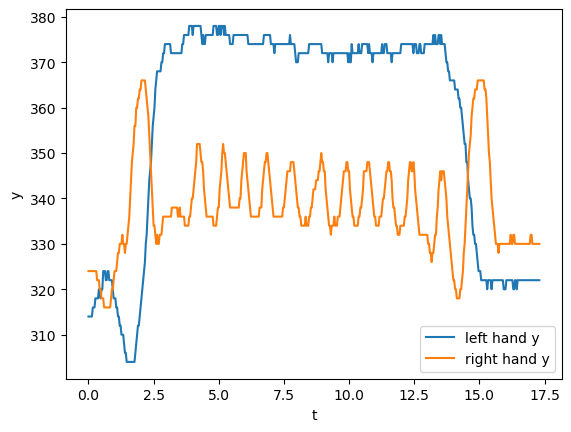

In [11]:
# 座標のプロット
fig = plt.figure() # Figureを作成
ax = fig.add_subplot(1,1,1) # Axesを作成
print('ax.lines before plot:\n', ax.lines) # Axes.linesは空リスト
line1, = ax.plot(df_spd['t'], df['pos_07x'], label='left hand x') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 1st plot:\n', ax.lines)
line2, = ax.plot(df_spd['t'], df['pos_04x'], label='right hand x') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 2nd plot:\n', ax.lines)
ax.legend()
ax.set_xlabel('t')  # Add an x-label to the axes.
ax.set_ylabel('x')  # Add a y-label to the axes.
print('line1:', line1)
print('line2:', line2)

# y point of left and right hands
fig_y = plt.figure() # Figureを作成
ax_y = fig_y.add_subplot(1,1,1) # Axesを作成
print('ax.lines before plot:\n', ax_y.lines) # Axes.linesは空リスト
line1_y, = ax_y.plot(df_spd['t'], df['pos_07y'], label='left hand y') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 1st plot:\n', ax_y.lines)
line2_y, = ax_y.plot(df_spd['t'], df['pos_04y'], label='right hand y') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 2nd plot:\n', ax_y.lines)
ax_y.legend()
ax_y.set_xlabel('t')  # Add an x-label to the axes.
ax_y.set_ylabel('y')  # Add a y-label to the axes.
print('line1:', line1_y)
print('line2:', line2_y)

ax.lines before plot:
 <Axes.ArtistList of 0 lines>
ax.lines after 1st plot:
 <Axes.ArtistList of 1 lines>
ax.lines after 2nd plot:
 <Axes.ArtistList of 2 lines>
line1: Line2D(left hand Vx)
line2: Line2D(right hand Vx)
ax.lines before plot:
 <Axes.ArtistList of 0 lines>
ax.lines after 1st plot:
 <Axes.ArtistList of 1 lines>
ax.lines after 2nd plot:
 <Axes.ArtistList of 2 lines>
line1: Line2D(left hand Vy)
line2: Line2D(right hand Vy)


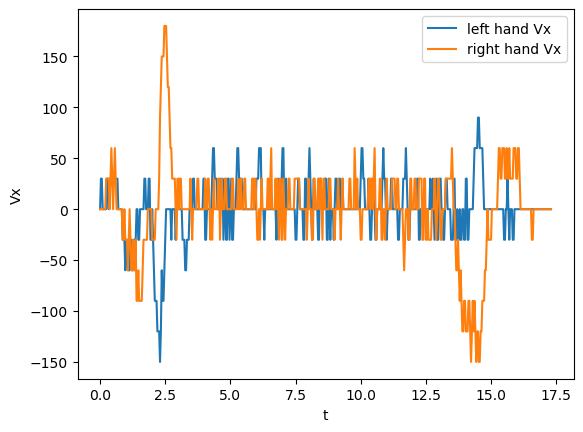

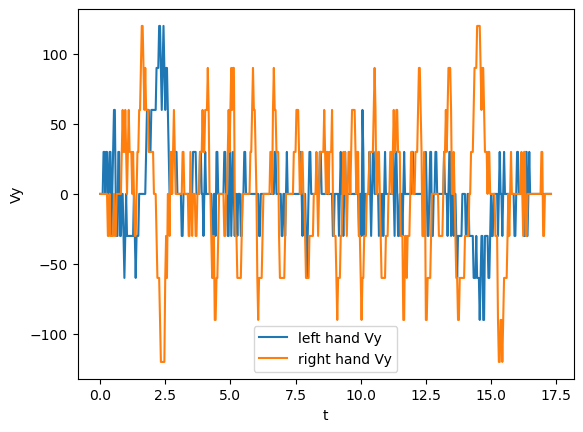

In [12]:
# 速度のプロット
fig = plt.figure() # Figureを作成
ax = fig.add_subplot(1,1,1) # Axesを作成
print('ax.lines before plot:\n', ax.lines) # Axes.linesは空リスト
line1, = ax.plot(df_spd['t'], df_spd['pos_07x'], label='left hand Vx') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 1st plot:\n', ax.lines)
line2, = ax.plot(df_spd['t'], df_spd['pos_04x'], label='right hand Vx') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 2nd plot:\n', ax.lines)
ax.legend()
ax.set_xlabel('t')  # Add an x-label to the axes.
ax.set_ylabel('Vx')  # Add a y-label to the axes.
print('line1:', line1)
print('line2:', line2)

# y point of left and right hands
fig_y = plt.figure() # Figureを作成
ax_y = fig_y.add_subplot(1,1,1) # Axesを作成
print('ax.lines before plot:\n', ax_y.lines) # Axes.linesは空リスト
line1_y, = ax_y.plot(df_spd['t'], df_spd['pos_07y'], label='left hand Vy') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 1st plot:\n', ax_y.lines)
line2_y, = ax_y.plot(df_spd['t'], df_spd['pos_04y'], label='right hand Vy') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 2nd plot:\n', ax_y.lines)
ax_y.legend()
ax_y.set_xlabel('t')  # Add an x-label to the axes.
ax_y.set_ylabel('Vy')  # Add a y-label to the axes.
print('line1:', line1_y)
print('line2:', line2_y)

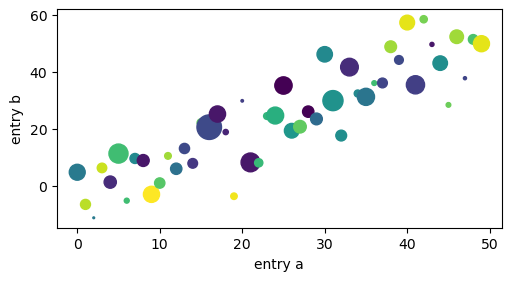

In [13]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

Text(0.5, 1.0, 'Relation of Velocity')

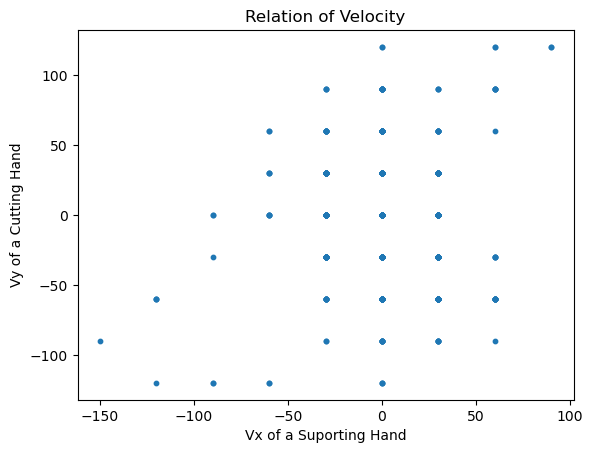

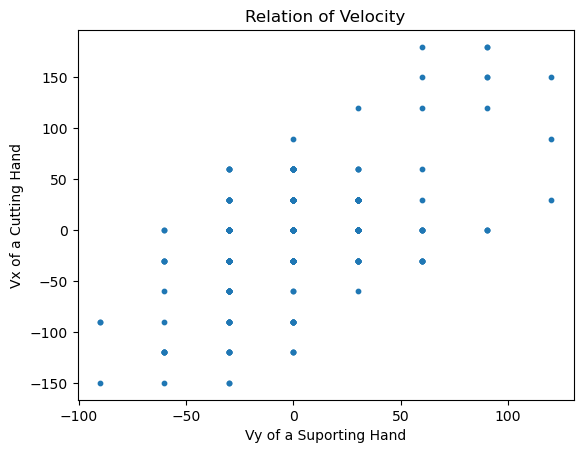

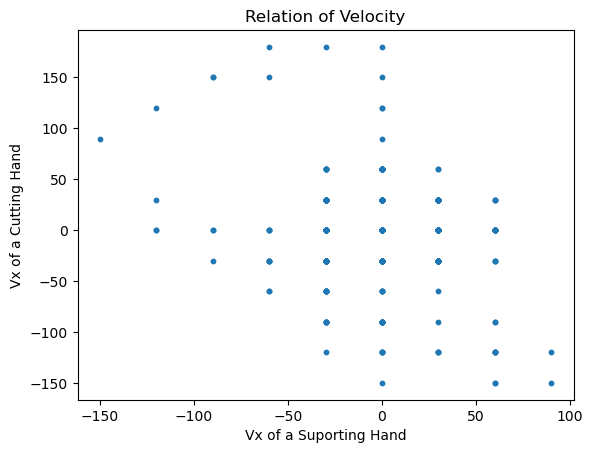

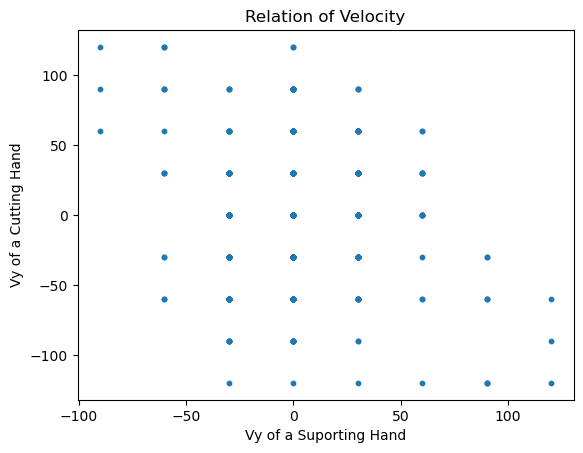

In [14]:
#pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
#fig.colorbar(pc, ax=axs[1, 1], extend='both')
#axs[1, 1].set_title('scatter()')

# 項で比較
figV = plt.figure() # Figureを作成
axV = figV.add_subplot(1,1,1) # Axesを作成
# 縦軸に右手Vy，横軸に左手Vxをプロット
scatHandsX = axV.scatter(df_spd['pos_07x'], df_spd['pos_04y'], s=10)
#axV.legend()
axV.set_xlabel('Vx of a Suporting Hand')
axV.set_ylabel('Vy of a Cutting Hand')
axV.set_title("Relation of Velocity")  # Add a title to the axes.

# 項で比較
figV = plt.figure() # Figureを作成
axV = figV.add_subplot(1,1,1) # Axesを作成
# 縦軸に右手Vx，横軸に左手Vyをプロット
scatHandsX = axV.scatter(df_spd['pos_07y'], df_spd['pos_04x'], s=10)
#axV.legend()
axV.set_xlabel('Vy of a Suporting Hand')
axV.set_ylabel('Vx of a Cutting Hand')
axV.set_title("Relation of Velocity")  # Add a title to the axes.

# 項で比較
figV = plt.figure() # Figureを作成
axV = figV.add_subplot(1,1,1) # Axesを作成
# 縦軸に右手Vx，横軸に左手Vxをプロット
scatHandsX = axV.scatter(df_spd['pos_07x'], df_spd['pos_04x'], s=10)
#axV.legend()
axV.set_xlabel('Vx of a Suporting Hand')
axV.set_ylabel('Vx of a Cutting Hand')
axV.set_title("Relation of Velocity")  # Add a title to the axes.

# 項で比較
figV = plt.figure() # Figureを作成
axV = figV.add_subplot(1,1,1) # Axesを作成
# 縦軸に右手Vy，横軸に左手Vyをプロット
scatHandsX = axV.scatter(df_spd['pos_07y'], df_spd['pos_04y'], s=10)
#axV.legend()
axV.set_xlabel('Vy of a Suporting Hand')
axV.set_ylabel('Vy of a Cutting Hand')
axV.set_title("Relation of Velocity")  # Add a title to the axes.

In [15]:
# 相関係数
df_spd_corr = df_spd.corr()
print(df_spd_corr)
print(type(df_spd_corr))

                t   pos_04x   pos_07x   pos_04y   pos_07y
t        1.000000 -0.167341  0.162090 -0.050291 -0.287539
pos_04x -0.167341  1.000000 -0.227034 -0.215930  0.496089
pos_07x  0.162090 -0.227034  1.000000  0.082904 -0.355634
pos_04y -0.050291 -0.215930  0.082904  1.000000 -0.200919
pos_07y -0.287539  0.496089 -0.355634 -0.200919  1.000000
<class 'pandas.core.frame.DataFrame'>
